In [43]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf # linear modeling


train_features = pd.read_csv('data/dengue_features_train.csv')
train_labels = pd.read_csv('data/dengue_labels_train.csv')

In [44]:
# find list of column names
#list(train_features.columns.values)

In [45]:
#  examples of plots

# sns.scatterplot(data = only_1990, x = "weekofyear", y = "total_cases")
# sns.scatterplot(data = only_1991, x = "weekofyear", y = "total_cases")
# sns.scatterplot(data = only_1992, x = "weekofyear", y = "total_cases")

In [46]:
# merge features and labels into results
result = pd.merge(train_features, train_labels, on=['weekofyear','year', 'city'])
# result = result.drop(columns=['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c','station_precip_mm', 'station_diur_temp_rng_c', 'precipitation_amt_mm'])
result.fillna(method='ffill', inplace=True)


In [47]:
# add column lag cases
def add_lag_cases(a, n):
    a= a.copy()
    
    # set columnm name
    name =  "lag_cases_" + str(n)
    
    #save first n values of total case
    last_n = []
    for i in range(len(a) - n,len(a)):
        last_n.append(a.iloc[i, a.columns.get_loc('total_cases')] )
        
    last_val = sum(last_n)/len(last_n)
    # shift columns  
    a[name] = a.total_cases.shift(-n)

    # add last values
    for i in range(len(a) - n,len(a)):
        a[name][i] = last_val
    return a        


In [48]:
def subset_by_year(year):
    return result[result.year == year]

def subset_by_city(city):
    return result[result.city == city]

# subsets data by year ito a list of dataframes
# result_by_year = [subset_by_year(y) for y in train_features.year.unique()]

# subsets data by CITY 
result_by_city = [subset_by_city(c).copy().reset_index(drop=True) for c in ['iq','sj']]

# add lag cases
#
# add 4 weeks lag
result_by_city[0] = add_lag_cases(result_by_city[0], 4)
result_by_city[1] = add_lag_cases(result_by_city[1], 4)

# add 8 weeks lag
result_by_city[0] = add_lag_cases(result_by_city[0], 8)
result_by_city[1] = add_lag_cases(result_by_city[1], 8)

# add 8 weeks lag
result_by_city[0] = add_lag_cases(result_by_city[0], 12)
result_by_city[1] = add_lag_cases(result_by_city[1], 12)

# # add mean vegetation index column
result_by_city[0]['mean_vegetation_index'] = (result_by_city[0]['ndvi_se'] + result_by_city[0]['ndvi_sw'] + result_by_city[0]['ndvi_ne'] + result_by_city[0]['ndvi_nw']) / 4
result_by_city[1]['mean_vegetation_index'] = (result_by_city[1]['ndvi_se'] + result_by_city[1]['ndvi_sw'] + result_by_city[1]['ndvi_ne'] + result_by_city[1]['ndvi_nw']) / 4

result_by_city[0]['max_vegetation_index'] = result_by_city[0][['ndvi_se','ndvi_sw','ndvi_ne', 'ndvi_nw']].apply(np.max,axis=1)
result_by_city[0]['min_vegetation_index'] = result_by_city[0][['ndvi_se','ndvi_sw','ndvi_ne', 'ndvi_nw']].apply(np.min,axis=1)

result_by_city[1]['max_vegetation_index'] = result_by_city[1][['ndvi_se','ndvi_sw','ndvi_ne', 'ndvi_nw']].apply(np.max,axis=1)
result_by_city[1]['min_vegetation_index'] = result_by_city[1][['ndvi_se','ndvi_sw','ndvi_ne', 'ndvi_nw']].apply(np.min,axis=1)

result_by_city[0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lag_cases_4,lag_cases_8,lag_cases_12,mean_vegetation_index,max_vegetation_index,min_vegetation_index
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,32.5,20.7,3.0,0,0.0,0.00,0.000000,0.228307,0.340886,0.132257
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,34.0,20.8,55.6,0,0.0,0.00,0.000000,0.256012,0.289457,0.216833
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,33.0,20.7,38.1,0,0.0,1.00,0.000000,0.170504,0.204114,0.128014
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,31.5,14.7,30.0,0,0.0,0.00,1.000000,0.206918,0.254200,0.145429
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,33.3,19.1,4.0,0,0.0,0.00,1.000000,0.316546,0.361043,0.254371
5,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,32.0,17.0,11.5,0,0.0,0.00,0.000000,0.220818,0.255314,0.190757
6,iq,2000,32,2000-08-12,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,...,34.0,19.9,72.9,0,1.0,0.00,0.000000,0.352582,0.387271,0.312486
7,iq,2000,33,2000-08-19,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,...,33.0,20.5,50.1,0,0.0,1.00,0.000000,0.375226,0.392240,0.341780
8,iq,2000,34,2000-08-26,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,...,34.0,19.0,89.2,0,0.0,1.00,0.000000,0.359936,0.408157,0.302714
9,iq,2000,35,2000-09-02,0.332043,0.321057,0.314614,0.324257,53.65,299.218571,...,34.0,20.0,78.0,0,0.0,0.00,0.000000,0.322993,0.332043,0.314614


In [49]:
result_by_city[1].corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lag_cases_4,lag_cases_8,lag_cases_12,mean_vegetation_index,max_vegetation_index,min_vegetation_index
year,1.000000,-0.073143,-0.388985,-0.495028,0.008188,-0.080679,0.039130,0.188870,0.192929,0.020255,...,-0.169664,0.000753,0.084859,-0.212690,-0.221048,-0.226681,-0.229636,-0.397848,-0.085388,-0.482503
weekofyear,-0.073143,1.000000,-0.062458,-0.035011,-0.038279,-0.074096,0.236115,0.567984,0.554162,0.572071,...,0.320370,0.518216,0.214038,0.287134,0.271432,0.208779,0.111187,-0.071056,-0.044327,-0.049176
ndvi_ne,-0.388985,-0.062458,1.000000,0.614698,0.207491,0.157257,-0.059808,-0.082125,-0.080713,-0.054253,...,0.102780,0.002738,-0.083680,0.004144,0.017468,0.048438,0.063212,0.802858,0.387930,0.856920
ndvi_nw,-0.495028,-0.035011,0.614698,1.000000,0.188704,0.219810,-0.041504,-0.077612,-0.076369,-0.028381,...,0.136895,0.017841,-0.083308,0.059208,0.065427,0.093627,0.114281,0.790637,0.339033,0.812133
ndvi_se,0.008188,-0.038279,0.207491,0.188704,1.000000,0.797349,-0.111004,-0.013301,-0.010259,-0.063016,...,-0.075178,-0.072331,-0.137604,-0.120024,-0.099698,-0.074132,-0.071812,0.623027,0.848974,0.170677
ndvi_sw,-0.080679,-0.074096,0.157257,0.219810,0.797349,1.000000,-0.115206,-0.038681,-0.031778,-0.082374,...,-0.010211,-0.068595,-0.169807,0.041055,0.030372,0.021159,-0.026155,0.610744,0.792430,0.176652
precipitation_amt_mm,0.039130,0.236115,-0.059808,-0.041504,-0.111004,-0.115206,1.000000,0.236147,0.224713,0.404579,...,0.192706,0.228427,0.567309,0.056942,0.070743,0.066683,0.046099,-0.101071,-0.142614,-0.029204
reanalysis_air_temp_k,0.188870,0.567984,-0.082125,-0.077612,-0.013301,-0.038681,0.236147,1.000000,0.997502,0.903613,...,0.699227,0.832807,0.115062,0.179402,0.267077,0.301166,0.263127,-0.082289,-0.071350,-0.036213
reanalysis_avg_temp_k,0.192929,0.554162,-0.080713,-0.076369,-0.010259,-0.031778,0.224713,0.997502,1.000000,0.895541,...,0.704506,0.827170,0.099347,0.172569,0.260591,0.298194,0.263846,-0.078659,-0.066751,-0.035905
reanalysis_dew_point_temp_k,0.020255,0.572071,-0.054253,-0.028381,-0.063016,-0.082374,0.404579,0.903613,0.895541,1.000000,...,0.690219,0.850041,0.286506,0.201086,0.278797,0.305515,0.267552,-0.072908,-0.121891,0.009844


In [50]:
result_by_city[0]['week_start_date'] = pd.to_datetime(result_by_city[0]['week_start_date'])
monthly_iquitos = result_by_city[0].groupby(result_by_city[0]['week_start_date'].dt.strftime('%B'))['total_cases'].sum().sort_values()

result_by_city[1]['week_start_date'] = pd.to_datetime(result_by_city[1]['week_start_date'])
monthly_san_juan = result_by_city[1].groupby(result_by_city[1]['week_start_date'].dt.strftime('%B'))['reanalysis_sat_precip_amt_mm'].mean().sort_values()

monthly_iquitos = pd.DataFrame({'Month':monthly_iquitos.index, 'Total Cases':monthly_iquitos.values})
monthly_san_juan = pd.DataFrame({'Month':monthly_san_juan.index, 'reanalysis_sat_precip_amt_mm':monthly_san_juan.values})




In [51]:
monthly_san_juan

,Month,reanalysis_sat_precip_amt_mm
0,March,5.810139
1,February,10.891250
2,January,19.033556
3,December,20.504861
4,July,34.780667
5,April,35.619889
6,August,43.556806
7,May,43.979167
8,June,45.555139
9,November,48.724306


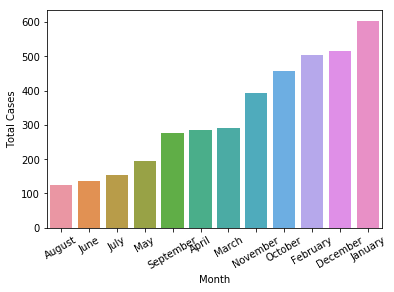

In [58]:

p = sns.barplot(data = monthly_iquitos, x = "Month", y = "Total Cases")
p.set_xticklabels(p.get_xticklabels(),rotation=30)
p = p.get_figure()
#p.savefig('imgs/iquitos-monthly.png')

In [59]:
p = sns.barplot(data = monthly_san_juan, x = "Month", y = "Total Cases")
p.set_xticklabels(p.get_xticklabels(),rotation=30)
p = p.get_figure()
p.savefig('imgs/san-juan-monthly.png')

ValueError: Could not interpret input 'Total Cases'

In [ ]:
# single plot
p = sns.distplot( result_by_city[1].total_cases, )
p = p.get_figure()
#p.savefig('imgs/san-juan-dist.png')


In [ ]:

p = sns.distplot( result_by_city[0].total_cases)
p = p.get_figure()
#p.savefig('imgs/iquitos-dist.png')

In [ ]:
p7 = sns.lmplot( data = result_by_city[1], x = "reanalysis_sat_precip_amt_mm",y = "total_cases")
p7.savefig('imgs/rain_1.png')

p8 = sns.lmplot( data = result_by_city[1], x = "reanalysis_sat_precip_amt_mm",y = "lag_cases_4")
p8.savefig('imgs/rain_2.png')

p9 = sns.lmplot( data = result_by_city[1], x = "reanalysis_sat_precip_amt_mm",y = "lag_cases_8")
p9.savefig('imgs/rain_3.png')


p1 = sns.lmplot( data = result_by_city[1], x = "reanalysis_avg_temp_k",y = "total_cases")
p1.savefig('imgs/dew_1.png')

p2 = sns.lmplot( data = result_by_city[1], x = "reanalysis_avg_temp_k",y = "lag_cases_4")
p2.savefig('imgs/dew_2.png')

p3 = sns.lmplot( data = result_by_city[1], x = "reanalysis_avg_temp_k",y = "lag_cases_8")
p3.savefig('imgs/dew_3.png')


p4 = sns.lmplot( data = result_by_city[1], x = "reanalysis_specific_humidity_g_per_kg",y = "total_cases")
p4.savefig('imgs/sh_1.png')

p5 = sns.lmplot( data = result_by_city[1], x = "reanalysis_specific_humidity_g_per_kg",y = "lag_cases_4")
p5.savefig('imgs/sh_2.png')

p6 = sns.lmplot( data = result_by_city[1], x = "reanalysis_specific_humidity_g_per_kg",y = "lag_cases_8")
p6.savefig(('imgs/sh_3.png'))

In [ ]:
g = sns.FacetGrid(result_by_city[1], col="year", margin_titles=True, col_wrap=4, height=3)
g.map(sns.scatterplot, "weekofyear", "total_cases")

# Show the plot
# g.savefig('imgs/san-juan-yearly.png')

In [13]:
########

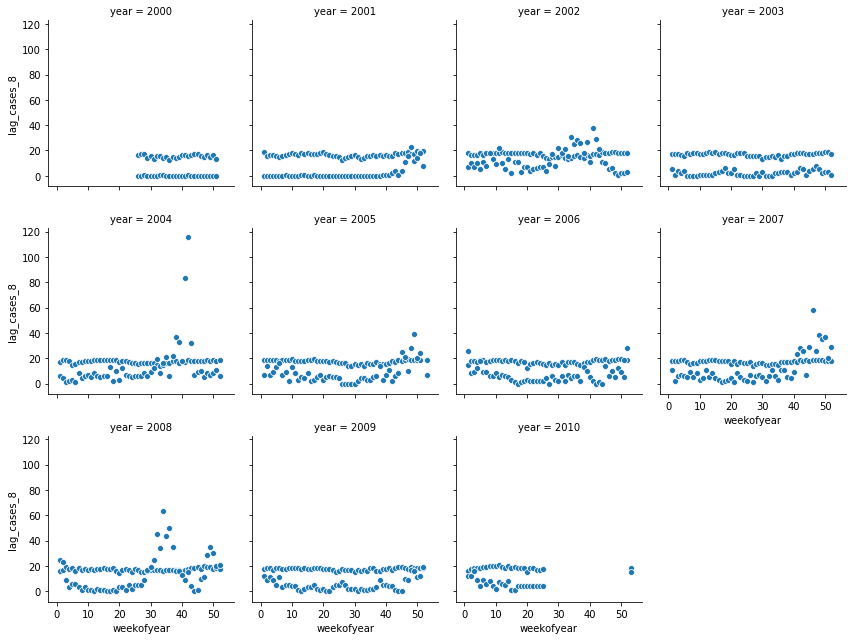

In [14]:
g = sns.FacetGrid(result_by_city[0], col="year", margin_titles=True, col_wrap=4, height=3)
g.map(sns.scatterplot, "weekofyear", "reanalysis_specific_humidity_g_per_kg")
g.map(sns.scatterplot, "weekofyear", "lag_cases_8")

# Show the plot
# g.savefig('imgs/iquitos-yearly.png')

In [15]:
(result_by_city[0]).head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lag_cases_4,lag_cases_8,lag_cases_12,mean_vegetation_index,max_vegetation_index,min_vegetation_index
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,32.5,20.7,3.0,0,0.0,0.0,0.0,0.228307,0.340886,0.132257
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,34.0,20.8,55.6,0,0.0,0.0,0.0,0.256012,0.289457,0.216833
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,33.0,20.7,38.1,0,0.0,1.0,0.0,0.170504,0.204114,0.128014
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,31.5,14.7,30.0,0,0.0,0.0,1.0,0.206918,0.254200,0.145429
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,33.3,19.1,4.0,0,0.0,0.0,1.0,0.316546,0.361043,0.254371


In [16]:
count_nan = len(result_by_city[0].precipitation_amt_mm) - result_by_city[0].precipitation_amt_mm.count()


In [17]:
result_by_city[0].precipitation_amt_mm.count()

520

In [18]:
len(result_by_city[1])

936

In [19]:
count_nan = len(result_by_city[0].reanalysis_avg_temp_k) - result_by_city[0].reanalysis_avg_temp_k.count()


In [20]:



    
df
# first_n

NameError: name 'df' is not defined

In [ ]:
# # add a month column
# def add_months(row):
#     if row('weekofyear') >= 1 and row('weekofyear') <= 5:
#         return 'January'
#     if row('weekofyear') >= 6 and row('weekofyear') <= 8:
#         return 'February'
#     if row('weekofyear') >= 9 and row('weekofyear') <= 12:
#         return 'March'
#     if row('weekofyear') >= 13 and row('weekofyear') <= 16:
#         return 'April'
#     if row('weekofyear') >= 17 and row('weekofyear') <= 20:
#         return 'May'
#     if row('weekofyear') >= 21 and row('weekofyear') <= 24:
#         return 'June'
#     if row('weekofyear') >= 25 and row('weekofyear') <= 28:
#         return 'July'
#     if row('weekofyear') >= 29 and row('weekofyear') <= 32:
#         return 'August'
#     if row('weekofyear') >= 33 and row('weekofyear') <= 36:
#         return 'September'
#     if row('weekofyear') >= 37 and row('weekofyear') <= 40:
#         return 'October'
#     if row('weekofyear') >= 41 and row('weekofyear') <= 44:
#         return 'November'
#     if row('weekofyear') >= 45 and row('weekofyear') <= 49:
#         return 'December'
    
# result['month'] = result.apply (lambda row: add_months (row),axis=1)

# # group by year
# # group by month
# # sum of all dengue cases

In [ ]:
print("Mean Temperature")
# Iquitos 
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['4_lag_cases']))
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['8_lag_cases']))
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['total_cases']))

# San Juan
print('---------------')
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['4_lag_cases']))
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['8_lag_cases']))
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['total_cases']))

In [ ]:
print("Mean Temperature")
# Iquitos 
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['4_lag_cases']))
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['8_lag_cases']))
print(result_by_city[0].reanalysis_avg_temp_k.corr(result_by_city[0]['total_cases']))

# San Juan
print('---------------')
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['4_lag_cases']))
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['8_lag_cases']))
print(result_by_city[1].reanalysis_avg_temp_k.corr(result_by_city[0]['total_cases']))

In [ ]:
# for each city, 
# for each column of interest

for city in range(0,2):
    print('******' + str(city) + '**********')
    for column in [ 'min_vegetation_index', 'max_vegetation_index','mean_vegetation_index','reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k','reanalysis_tdtr_k','reanalysis_avg_temp_k' , 'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']:
        print(column)
        print(result_by_city[city][column].corr(result_by_city[city]['lag_cases_4']))
        print(result_by_city[city][column].corr(result_by_city[city]['lag_cases_8']))
        print(result_by_city[city][column].corr(result_by_city[city]['total_cases']))

In [21]:
formula_8 = 'total_cases ~ reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k + min_vegetation_index  + reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg '
formula_4 = 'lag_cases_4 ~ reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k + min_vegetation_index  + reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg '
formula_total = 'lag_cases_8 ~ reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k + min_vegetation_index  + reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg '

In [22]:
import statsmodels.formula.api as smf # linear modeling

lm = smf.ols(formula='lag_cases_8 ~ reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k + min_vegetation_index + reanalysis_max_air_temp_k + reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg ', data=result_by_city[1]).fit()


In [23]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lag_cases_8   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.67e-22
Time:                        23:26:10   Log-Likelihood:                -4955.4
No. Observations:                 936   AIC:                             9927.
Df Residuals:                     928   BIC:                             9965.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -5998.5760   5558.790     -1.079      0.281   -1.69e+04    4910.681
reanalysis_avg_temp_k                   -15.3365      7.073     -2.168      0.030     -29.217      -1.456
reanalysis_dew_point_temp_k              11.5053     19.557      0.588      0.556     -26.877      49.887
reanalysis_min_air_temp_k                12.6773      4.466      2.839      0.005       3.913      21.442
min_vegetation_index                     58.9920     17.427      3.385      0.001      24.791      93.193
reanalysis_max_air_temp_k                11.9027      4.370      2.724      0.007       3.327      20.479
reanalysis_sat_precip_amt_mm             -0.0551      0.042     -1.297      0.195      -0.138       0.028
reanalysis_specific_humidity_g_per_kg    -7.7888     19.941     -0.391      0.696     -46.924      31.346
==============================================================================
Omnibus:                      921.455   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35099.765
Skew:                           4.673   Prob(JB):                         0.00
Kurtosis:                      31.507   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
formula = 'reanalysis_precip_amt_kg_per_m2 +  reanalysis_air_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k  + reanalysis_specific_humidity_g_per_kg '
formula_8 = 'total_cases ~ ' + formula
formula_4 = 'lag_cases_4 ~ ' + formula
formula_total = 'lag_cases_8 ~ ' + formula

In [25]:
# Negative Binomial
import statsmodels.api as sm
names = [ 'lag_cases_8',  'lag_cases_4','total_cases']
i = 0


for f in [formula_total, formula_4, formula_8]:
    print(names[i])
    print(f)
#     nb0 = smf.glm(f, data=result_by_city[0], family=sm.families.NegativeBinomial(alpha=1e-08)).fit()
#     result_by_city[0]['preds'] = nb0.predict()
#     print(eval_measures.meanabs(result_by_city[0]['preds'], result_by_city[0]['total_cases']))
    
#     x= sns.lmplot(y='preds', x = 'total_cases', data=result_by_city[0])

#     x.savefig('imgs/' + 'Negative_Binomial-iq' +  '.png')
    
    
    nb1 = smf.glm(f, data=result_by_city[1], family=sm.families.NegativeBinomial(alpha=1e-08)).fit()
    result_by_city[1]['preds'] = nb1.predict()
    print(eval_measures.meanabs(result_by_city[1]['preds'], result_by_city[1]['total_cases']))
    
    x= sns.lmplot(y='preds', x = 'total_cases', data=result_by_city[1])

    x.savefig('imgs/' + 'Negative-Binomial-san-juan' +  '.png')
    
    i = i + 1

lag_cases_8
lag_cases_8 ~ reanalysis_precip_amt_kg_per_m2 +  reanalysis_air_temp_k + reanalysis_dew_point_temp_k + reanalysis_min_air_temp_k  + reanalysis_specific_humidity_g_per_kg 


NameError: name 'eval_measures' is not defined

In [ ]:
# Poisson
names = [ 'lag_cases_8',  'lag_cases_4','total_cases']
i = 0
for f in [formula_total, formula_4, formula_8]:
    print(names[i])
    p0 = smf.glm(f, data=result_by_city[0], family=sm.families.Poisson()).fit()
    result_by_city[0]['preds'] = p0.predict()
    print(p0.predict())
    print(eval_measures.meanabs(result_by_city[0]['preds'], result_by_city[0]['total_cases']))
    
    x= sns.lmplot(y='preds', x = 'total_cases', data=result_by_city[0])
    x.savefig('imgs/' + 'Poisson_iq' +  '.png')
    
    
    p1 = smf.glm(f, data=result_by_city[1], family=sm.families.Poisson()).fit()
    result_by_city[1]['preds'] = p1.predict()
    print(eval_measures.meanabs(result_by_city[1]['preds'], result_by_city[1]['total_cases']))
    
    x= sns.lmplot(y='preds', x = 'total_cases', data=result_by_city[1])
    x.savefig('imgs/' + 'Poisson_san-juan' +  '.png')
    
    i = i + 1

In [26]:
result_by_city[1].corr() 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_min_temp_c,station_precip_mm,total_cases,lag_cases_4,lag_cases_8,lag_cases_12,mean_vegetation_index,max_vegetation_index,min_vegetation_index,preds
year,1.000000,-0.073143,-0.388985,-0.495028,0.008188,-0.080679,0.039130,0.188870,0.192929,0.020255,...,0.000753,0.084859,-0.212690,-0.221048,-0.226681,-0.229636,-0.397848,-0.085388,-0.482503,0.066162
weekofyear,-0.073143,1.000000,-0.062458,-0.035011,-0.038279,-0.074096,0.236115,0.567984,0.554162,0.572071,...,0.518216,0.214038,0.287134,0.271432,0.208779,0.111187,-0.071056,-0.044327,-0.049176,0.544587
ndvi_ne,-0.388985,-0.062458,1.000000,0.614698,0.207491,0.157257,-0.059808,-0.082125,-0.080713,-0.054253,...,0.002738,-0.083680,0.004144,0.017468,0.048438,0.063212,0.802858,0.387930,0.856920,-0.047636
ndvi_nw,-0.495028,-0.035011,0.614698,1.000000,0.188704,0.219810,-0.041504,-0.077612,-0.076369,-0.028381,...,0.017841,-0.083308,0.059208,0.065427,0.093627,0.114281,0.790637,0.339033,0.812133,-0.025895
ndvi_se,0.008188,-0.038279,0.207491,0.188704,1.000000,0.797349,-0.111004,-0.013301,-0.010259,-0.063016,...,-0.072331,-0.137604,-0.120024,-0.099698,-0.074132,-0.071812,0.623027,0.848974,0.170677,-0.028891
ndvi_sw,-0.080679,-0.074096,0.157257,0.219810,0.797349,1.000000,-0.115206,-0.038681,-0.031778,-0.082374,...,-0.068595,-0.169807,0.041055,0.030372,0.021159,-0.026155,0.610744,0.792430,0.176652,-0.044938
precipitation_amt_mm,0.039130,0.236115,-0.059808,-0.041504,-0.111004,-0.115206,1.000000,0.236147,0.224713,0.404579,...,0.228427,0.567309,0.056942,0.070743,0.066683,0.046099,-0.101071,-0.142614,-0.029204,0.307343
reanalysis_air_temp_k,0.188870,0.567984,-0.082125,-0.077612,-0.013301,-0.038681,0.236147,1.000000,0.997502,0.903613,...,0.832807,0.115062,0.179402,0.267077,0.301166,0.263127,-0.082289,-0.071350,-0.036213,0.931501
reanalysis_avg_temp_k,0.192929,0.554162,-0.080713,-0.076369,-0.010259,-0.031778,0.224713,0.997502,1.000000,0.895541,...,0.827170,0.099347,0.172569,0.260591,0.298194,0.263846,-0.078659,-0.066751,-0.035905,0.923877
reanalysis_dew_point_temp_k,0.020255,0.572071,-0.054253,-0.028381,-0.063016,-0.082374,0.404579,0.903613,0.895541,1.000000,...,0.850041,0.286506,0.201086,0.278797,0.305515,0.267552,-0.072908,-0.121891,0.009844,0.944952


In [27]:
p1.summary()
from statsmodels.tools import eval_measures

result_by_city[1]['preds'] = p1.predict()
score = eval_measures.meanabs(result_by_city[1]['preds'], result_by_city[1]['lag_cases_4'])

NameError: name 'p1' is not defined

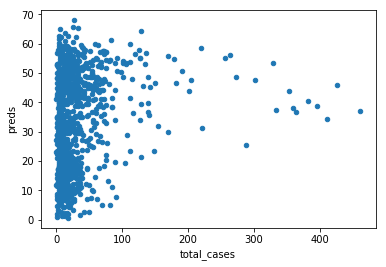

In [28]:
x =result_by_city[1].plot('total_cases' , 'preds', kind="scatter")


In [29]:
with open ("data/meta_Digital_Music.json", "r") as myfile:
    data=myfile.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'data/meta_Digital_Music.json'

In [30]:
print(len(data))
type(data)

NameError: name 'data' is not defined

In [31]:
from ast import literal_eval

new_data = [literal_eval(x) for x in data]

NameError: name 'data' is not defined

In [32]:
print('hi')

hi


In [33]:
from ast import literal_eval

# for x in range(0,10):
#      print(literal_eval(data[x]))

literal_eval(data[0])

NameError: name 'data' is not defined

In [34]:
d = data[338]

NameError: name 'data' is not defined

In [35]:
d

NameError: name 'd' is not defined

In [36]:
d = d.replace("\n", "")

NameError: name 'd' is not defined

In [37]:
import json
json.load(d)

NameError: name 'd' is not defined

In [38]:
new_df = []

In [39]:


for i in range(0, len(data)):
    try:
        print(i)
        new_df.append(eval(data[i]))
    except:
        print("skipping" + data[i])

NameError: name 'data' is not defined

In [40]:
price = pd.DataFrame.from_dict(new_df, orient='columns')


In [41]:
price.price.max()

AttributeError: 'DataFrame' object has no attribute 'price'

In [42]:
len(price)

0